# Task 2: Random Data?

## Question

> I ran the following code for a binary classification task w/ an SVM in both R (first sample) and Python (second example).
>
> Given randomly generated data (X) and response (Y), this code performs leave group out cross validation 1000 times. Each entry of Y is therefore the mean of the prediction across CV iterations.
> 
> Computing area under the curve should give ~0.5, since X and Y are completely random. However, this is not what we see. Area under the curve is frequently significantly higher than 0.5. The number of rows of X is very small, which can obviously cause problems.
>
> Any idea what could be happening here? I know that I can either increase the number of rows of X or decrease the number of columns to mediate the problem, but I am looking for other issues.

```R
Y=as.factor(rep(c(1,2), times=14))
X=matrix(runif(length(Y)*100), nrow=length(Y))

library(e1071)
library(pROC)

colnames(X)=1:ncol(X)
iter=1000
ansMat=matrix(NA,length(Y),iter)
for(i in seq(iter)){    
    #get train

    train=sample(seq(length(Y)),0.5*length(Y))
    if(min(table(Y[train]))==0)
    next

    #test from train
    test=seq(length(Y))[-train]

    #train model
    XX=X[train,]
    YY=Y[train]
    mod=svm(XX,YY,probability=FALSE)
    XXX=X[test,]
    predVec=predict(mod,XXX)
    RFans=attr(predVec,'decision.values')
    ansMat[test,i]=as.numeric(predVec)
}

ans=rowMeans(ansMat,na.rm=TRUE)

r=roc(Y,ans)$auc
print(r)
```

Similarly, when I implement the same thing in Python I get similar results.



In [29]:
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix

In [35]:
    Y = np.array([1, 2]*14)
    X = np.random.uniform(size=[len(Y), 100])
    #print('X',X)
    #print('Y', Y)
    n_iter = 10
    ansMat = np.full((len(Y), n_iter), np.nan)
    for i in range(n_iter):
        # Get train/test index
        train = np.random.choice(range(int(len(Y))), size=int(0.5*len(Y)), replace=False, p=None)
        print('TRAIN:',Y[train], np.count_nonzero(Y[train] == 2))
        
        if len(np.unique(Y)) == 1:
            continue
        test = np.array([i for i in range(len(Y)) if i not in train])
        print('TEST:',Y[test])
        mod = SVC(probability=False)
        mod.fit(X=X[train, :], y=Y[train])
        # predict and collect answer
        ansMat[test, i] = mod.predict(X[test, :])
        print('ansMat[test, i]:', ansMat[test, i], np.count_nonzero(ansMat[test, i] == 2))
        print('confusion_matrix:\n',confusion_matrix(Y[test], ansMat[test, i]))
        fpr, tpr, thresholds = roc_curve(Y[test], ansMat[test, i], pos_label=1)
        print('fpr:', fpr,'\t tpr:', tpr,'\n')
    ans = np.nanmean(ansMat, axis=1)
    fpr, tpr, thresholds = roc_curve(Y, ans, pos_label=1)
    print(auc(fpr, tpr))
    print('fpr', fpr,'\n')
    print('tpr', tpr,'\n')
    


TRAIN: [2 1 1 2 2 2 1 2 1 2 2 1 2 2] 9
TEST: [1 1 1 1 1 2 2 2 1 1 2 1 2 1]
ansMat[test, i]: [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.] 14
confusion_matrix:
 [[0 9]
 [0 5]]
fpr: [0. 1.] 	 tpr: [0. 1.] 

TRAIN: [2 1 1 1 2 1 2 2 1 1 2 1 1 2] 6
TEST: [1 2 2 2 1 2 1 2 1 1 2 2 1 2]
ansMat[test, i]: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0
confusion_matrix:
 [[6 0]
 [8 0]]
fpr: [0. 1.] 	 tpr: [0. 1.] 

TRAIN: [2 1 1 1 1 1 2 1 1 1 1 2 2 2] 5
TEST: [2 1 1 2 2 1 2 2 2 2 2 1 2 1]
ansMat[test, i]: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0
confusion_matrix:
 [[5 0]
 [9 0]]
fpr: [0. 1.] 	 tpr: [0. 1.] 

TRAIN: [2 1 2 2 1 1 2 2 2 2 2 2 1 1] 9
TEST: [1 1 2 1 1 1 2 1 2 2 1 1 2 1]
ansMat[test, i]: [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.] 14
confusion_matrix:
 [[0 9]
 [0 5]]
fpr: [0. 1.] 	 tpr: [0. 1.] 

TRAIN: [2 2 2 2 1 2 1 2 2 1 1 1 1 1] 7
TEST: [2 2 1 1 2 1 2 1 1 2 1 2 2 1]
ansMat[test, i]: [1. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 2. 1.] 10
confusion_matrix:
 [[3 4]
 [1 6]]
fpr: [0.         

TRAIN: [1 1 1 1 1 2 2 1 2 2 2 1 2 1] 6
TEST: [2 1 2 1 2 1 2 1 2 1 2 1 2 2]
ansMat[test, i]: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0
confusion_matrix:
 [[6 0]
 [8 0]]
fpr: [0. 1.] 	 tpr: [0. 1.] 

TRAIN: [1 2 1 2 2 1 2 1 1 1 2 2 1 2] 7
TEST: [2 1 1 2 1 1 2 1 2 2 1 2 1 2]
ansMat[test, i]: [1. 1. 2. 1. 1. 1. 1. 2. 1. 2. 1. 1. 2. 1.] 4
confusion_matrix:
 [[4 3]
 [6 1]]
fpr: [0.         0.14285714 1.        ] 	 tpr: [0.         0.42857143 1.        ] 

TRAIN: [2 2 1 2 1 2 1 1 1 1 2 2 1 1] 6
TEST: [1 2 1 1 2 2 1 2 2 1 1 2 2 2]
ansMat[test, i]: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0
confusion_matrix:
 [[6 0]
 [8 0]]
fpr: [0. 1.] 	 tpr: [0. 1.] 

TRAIN: [1 1 1 2 2 1 2 2 2 2 2 1 2 2] 9
TEST: [1 2 2 1 1 2 1 2 1 1 1 1 1 2]
ansMat[test, i]: [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.] 14
confusion_matrix:
 [[0 9]
 [0 5]]
fpr: [0. 1.] 	 tpr: [0. 1.] 

TRAIN: [2 2 1 2 2 1 2 2 2 2 1 1 1 2] 9
TEST: [2 1 1 1 2 1 1 2 1 2 1 2 1 1]
ansMat[test, i]: [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.] 1

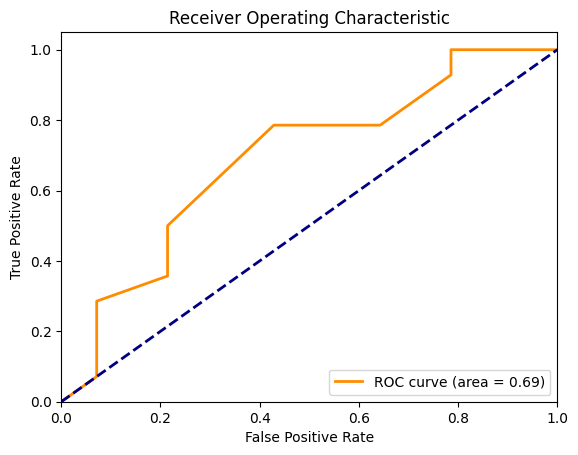

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
import numpy as np
from sklearn.svm import SVC

Y = np.array([1, 2]*14)
X = np.random.uniform(size=[len(Y), 100])

n_iter = 10
ansMat = np.full((len(Y), n_iter), np.nan)

for i in range(n_iter):
    # Get train/test index
    train = np.random.choice(range(int(len(Y))), size=int(0.5*len(Y)), replace=False, p=None)
    print('TRAIN:',Y[train], np.count_nonzero(Y[train] == 2))
    
    if len(np.unique(Y)) == 1:
        continue
    test = np.array([i for i in range(len(Y)) if i not in train])
    print('TEST:',Y[test])
    mod = SVC(probability=False)
    mod.fit(X=X[train, :], y=Y[train])
    # predict and collect answer
    ansMat[test, i] = mod.predict(X[test, :])
    print('ansMat[test, i]:', ansMat[test, i], np.count_nonzero(ansMat[test, i] == 2))
    print('confusion_matrix:\n',confusion_matrix(Y[test], ansMat[test, i]))
    fpr, tpr, thresholds = roc_curve(Y[test], ansMat[test, i], pos_label=1)
    print('fpr:', fpr,'\t tpr:', tpr,'\n')

ans = np.nanmean(ansMat, axis=1)
fpr, tpr, thresholds = roc_curve(Y, ans, pos_label=1)
auc_score = auc(fpr, tpr)

# Plotting the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


TRAIN: [1 2 2 1 2 1 2 1 1 2 1 2 1 1] 6
TEST: [1 2 2 2 2 1 2 1 2 1 2 1 1 2]
ansMat[test, i]: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0
confusion_matrix:
 [[6 0]
 [8 0]]
fpr: [0. 1.] 	 tpr: [0. 1.] 

TRAIN: [2 1 1 1 2 1 2 1 2 1 2 1 1 2] 6
TEST: [2 2 1 1 2 2 1 2 1 1 2 1 2 2]
ansMat[test, i]: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0
confusion_matrix:
 [[6 0]
 [8 0]]
fpr: [0. 1.] 	 tpr: [0. 1.] 

TRAIN: [2 1 1 1 1 2 1 1 2 2 1 2 2 1] 6
TEST: [2 2 1 2 1 2 1 2 1 1 2 1 2 2]
ansMat[test, i]: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0
confusion_matrix:
 [[6 0]
 [8 0]]
fpr: [0. 1.] 	 tpr: [0. 1.] 

TRAIN: [2 1 2 1 1 2 1 1 1 2 1 2 1 2] 6
TEST: [1 2 2 1 2 2 1 1 2 1 2 2 2 1]
ansMat[test, i]: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 0
confusion_matrix:
 [[6 0]
 [8 0]]
fpr: [0. 1.] 	 tpr: [0. 1.] 

TRAIN: [2 2 1 2 2 2 1 1 2 1 2 2 2 1] 9
TEST: [1 1 2 1 1 1 1 2 1 2 1 1 2 2]
ansMat[test, i]: [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.] 14
confusion_matrix:
 [[0 9]
 [0 5]]
fpr: [0. 1.] 	 tpr:

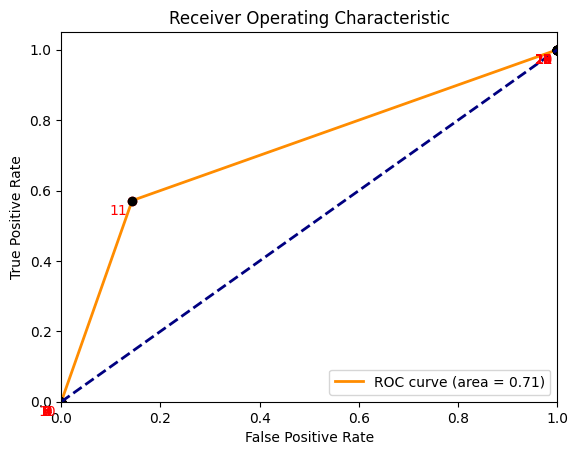

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix
import numpy as np
from sklearn.svm import SVC

Y = np.array([1, 2]*14)
X = np.random.uniform(size=[len(Y), 100])

n_iter = 10
ansMat = np.full((len(Y), n_iter), np.nan)

fpr_all = []
tpr_all = []

for i in range(n_iter):
    # Get train/test index
    train = np.random.choice(range(int(len(Y))), size=int(0.5*len(Y)), replace=False, p=None)
    print('TRAIN:', Y[train], np.count_nonzero(Y[train] == 2))
    
    if len(np.unique(Y)) == 1:
        continue
    test = np.array([i for i in range(len(Y)) if i not in train])
    print('TEST:', Y[test])
    mod = SVC(probability=False)
    mod.fit(X=X[train, :], y=Y[train])
    # predict and collect answer
    ansMat[test, i] = mod.predict(X[test, :])
    print('ansMat[test, i]:', ansMat[test, i], np.count_nonzero(ansMat[test, i] == 2))
    print('confusion_matrix:\n', confusion_matrix(Y[test], ansMat[test, i]))
    fpr, tpr, thresholds = roc_curve(Y[test], ansMat[test, i], pos_label=1)
    print('fpr:', fpr, '\t tpr:', tpr, '\n')
    fpr_all.append(fpr)
    tpr_all.append(tpr)

# Concatenate FPR and TPR arrays
fpr_all = np.concatenate(fpr_all)
tpr_all = np.concatenate(tpr_all)

# Sort the FPR and TPR arrays in ascending order
sorted_indices = np.argsort(fpr_all)
fpr_all = fpr_all[sorted_indices]
tpr_all = tpr_all[sorted_indices]

auc_score = auc(fpr_all, tpr_all)

# Plotting the ROC curve with dots
plt.plot(fpr_all, tpr_all, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot(fpr_all, tpr_all, 'o', color='black')

# Plotting individual dots
for i in range(len(fpr_all)):
    plt.scatter(fpr_all[i], tpr_all[i], color='red')
    plt.annotate(i + 1, (fpr_all[i], tpr_all[i]), textcoords="offset points", xytext=(-10, -10), ha='center', color='red')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [6]:
len(np.unique(Y))

2

In [7]:
Y = np.array([1, 2]*14)
X = np.random.uniform(size=[len(Y), 100])
n_iter = 1000

In [8]:
Y.shape

(28,)

In [9]:
X.shape

(28, 100)

In [10]:
ansMat = np.full((len(Y), n_iter), np.nan)

In [11]:
ansMat.shape

(28, 1000)

In [12]:
#for i in range(n_iter):
        # Get train/test index
train = np.random.choice(range(int(len(Y))), size=int(0.5*len(Y)), replace=False, p=None)

In [13]:
train

array([27,  0, 13, 19, 11, 14, 17,  6, 25, 20, 12, 21,  5,  4])

In [14]:
        #if len(np.unique(Y)) == 1:
        #    continue
test = np.array([i for i in range(len(Y)) if i not in train])

In [15]:
test

array([ 1,  2,  3,  7,  8,  9, 10, 15, 16, 18, 22, 23, 24, 26])

In [16]:
mod = SVC(probability=False)
mod.fit(X=X[train, :], y=Y[train])
        # predict and collect answer

SVC()

In [17]:
ansMat[test, 0] = mod.predict(X[test, :])   

In [19]:
ans

array([nan,  2.,  2.,  2., nan, nan, nan,  2.,  2.,  2.,  2., nan, nan,
       nan, nan,  2.,  2., nan,  2., nan, nan, nan,  2.,  2.,  2., nan,
        2., nan])

## Your answer

Clearly, the code is dividing the data into a 50% training set and a 50% testing set, resulting in a significant loss of data during training. The model's testing set consists of random data, which prevents it from utilizing the information from that portion of the data. Furthermore, a leave-out strategy is employed where each training set includes all samples except those belonging to one specific group. By examining the confusion matrix, true positive rate (TPR), and false positive rate (FPR) of the training data in each iteration, we can observe that the model tends to predict the more frequent label. The randomness in the data splits adds to the variability of the results, as the specific splits chosen in each iteration may unintentionally impact the model's performance and yield higher area under the curve (AUC) values.

For instance, consider the following training and test data:

<span style="color:red">TRAIN: [1 2 2 1 2 1 2 1 1 2 1 2 1 1] Number of label 2: 6</span>

<span style="color:red">TEST: [1 2 2 2 2 1 2 1 2 1 2 1 1 2]</span>

<span style="color:red">ansMat[test, i]: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] Number of label 2: 0</span>

confusion_matrix:

<span style="color:red">[[6 0]</span>

<span style="color:red">[8 0]]</span>

<span style="color:red">fpr: [0. 1.] tpr: [0. 1.]</span>

In this case, there are more instances of label 1 than label 2, and the model predicts label 1 as the target. Similarly, in the following example:

<span style="color:red">TRAIN: [2 2 1 2 2 2 1 1 2 1 2 2 2 1] Number of label 2: 9</span>

<span style="color:red">TEST: [1 1 2 1 1 1 1 2 1 2 1 1 2 2]</span>

<span style="color:red">ansMat[test, i]: [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.] Number of label 2: 14</span>

confusion_matrix:

<span style="color:red">[[0 9]</span>

<span style="color:red">[0 5]]</span>

<span style="color:red">fpr: [0. 1.] tpr: [0. 1.]</span>

Here, the number of label 2 instances exceeds that of label 1, resulting in the model predicting label 2 as the target. However, in some cases, the number of labels is equal, and the model behaves differently:

<span style="color:red">TRAIN: [1 2 2 2 1 2 1 2 1 2 1 2 1 1] Number of label 2: 7</span>

<span style="color:red">TEST: [1 2 1 1 1 2 1 2 1 1 2 2 2 2]</span>

<span style="color:red">ansMat[test, i]: [1. 1. 1. 1. 2. 1. 2. 1. 2. 2. 1. 1. 1. 2.] Number of label 2: 5</span>

confusion_matrix:

<span style="color:red">[[3 4]</span>

<span style="color:red">[6 1]]</span>

<span style="color:red">fpr: [0. 0.14285714 1. ] tpr: [0. 0.57142857 1. ]</span>

In this case, the model tends to favor one label with a probability of <span style="color:red">0.8 (in 80% of iterations)</span>.

Moreover, the data is generated randomly, which means there may be some random patterns within the data. These patterns can be learned by the SVM (Support Vector Machine) model. However, since the dataset consists of only 28 samples, which is relatively small, there is a higher chance of introducing variability. Consequently, the AUC value may not accurately reflect the model's true performance.

However, as you mentioned, there are two potential ways to mitigate this problem. One option is to increase the number of rows in the feature matrix X, which refers to the number of samples. Alternatively, you can decrease the number of columns, representing the feature matrix's dimensionality. By doing so, you address the following reasons:

With a feature matrix shape of 28 * 100, each sample has 100 features. Since SVM performs well in finding linear decision boundaries, having a larger number of features increases the likelihood of finding linearly separable patterns.

Given the small number of samples, the dataset is more prone to higher variability (28). This means that the AUC value may not accurately reflect the model's true performance due to the limitations imposed by the small dataset size.

## Feedback

Was this exercise is difficult or not? In either case, briefly describe why.